In [1]:
%pylab inline
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


In [151]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("images/video_images"):
    os.mkdir("images/video_images")

if not os.path.exists("images/video_images2"):
    os.mkdir("images/video_images2")

In [139]:
mpl.rcParams.update({'font.size':24})


In [163]:
x,y,f = np.loadtxt("LatticeSierpinski_6x6.xyz",usecols=(1,2,4),skiprows=2,unpack=True)
#x,y,f = np.loadtxt("array_6x6.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

ind = np.argsort(f)

x,y,f = x[ind], y[ind], f[ind]

In [164]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [165]:
H = np.zeros((natoms,natoms))

In [166]:
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        else:
            pass

In [167]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]

In [168]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

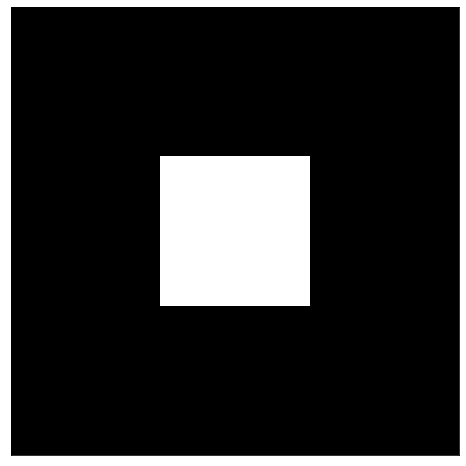

In [169]:
figsize(7,7)
fig, ax = plt.subplots(1)
ax.plot(x,y, marker='o', color='black', markersize=1,linestyle="")

boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - 1, Ry[i] - 1), 2,2)
    boxes.append(rect)

    
pc = PatchCollection(boxes, facecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
#ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(min(x)-0.5, max(x)+0.5)
ax.set_ylim(min(y)-0.5, max(y)+0.5)
fig.tight_layout()
#fig.savefig('hoti_fractal_square.pdf')
#fig.savefig('fractal_square4.png')
plt.show()

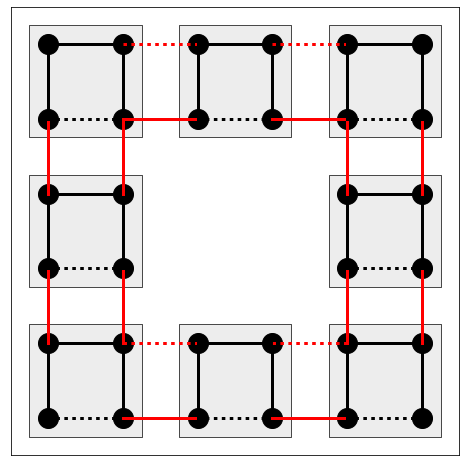

In [170]:
figsize(7,7)
fig, ax = plt.subplots(1)
ax.plot(x,y, marker='o', color='black', markersize=20,linestyle="")

boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - 0.75, Ry[i] - 0.75), 1.5,1.5)
    boxes.append(rect)
for i in Dic.keys():
    c = 0
    for v in Dic[i]:
        if Hop[i][c] == 1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 3)
        elif Hop[i][c] == -1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 3, ls = ':')
        elif Hop[i][c] == 4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw =3)
        elif Hop[i][c] == -4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw =3, ls = ':')
        c+=1  
        

    
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
#ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(min(x)-0.5, max(x)+0.5)
ax.set_ylim(min(y)-0.5, max(y)+0.5)
fig.tight_layout()
#fig.savefig('hoti_fractal_square.pdf')
plt.show()

In [171]:
δ = 1e-3
C   = 1.0     # cm^-1
κ   = 1    # μm^-1
L   = 1   # μm
A   = 0.5     # μm
γ, λ = 0.303,1.0

def func_cext(θ):
    return  λ*exp(-κ*(L+A*cos(θ)))

def func_cint(θ):
    return γ*exp(-κ*(L-A*cos(θ)))


<ipython-input-183-b8c9fadf074b>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2)


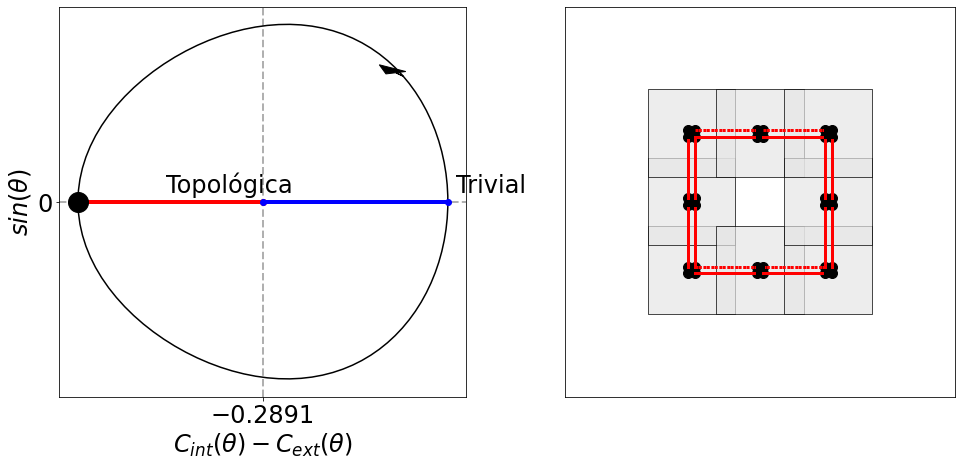

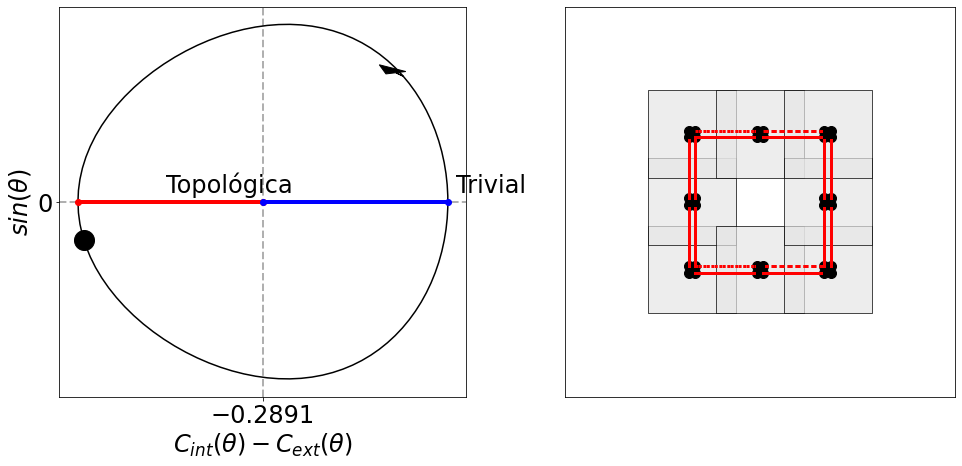

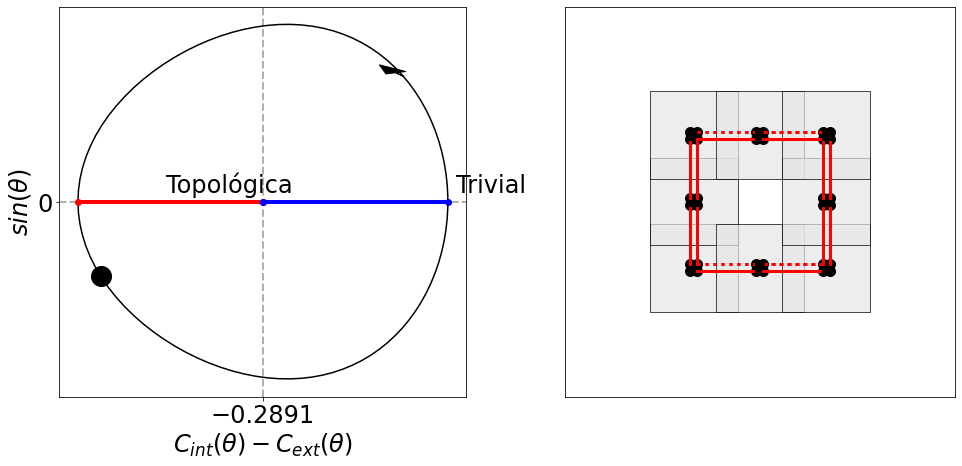

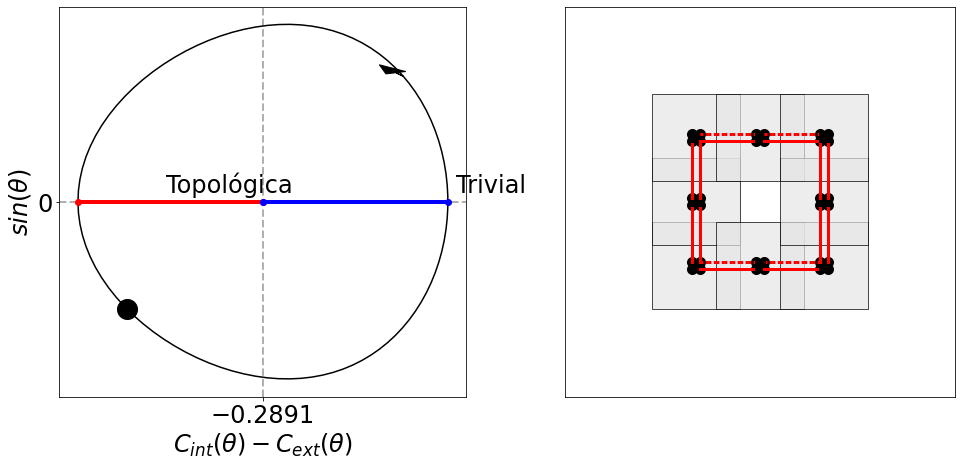

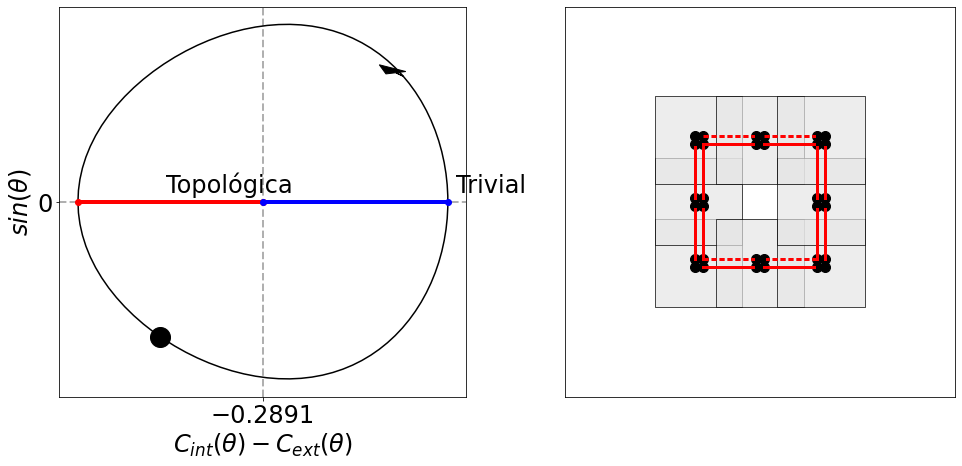

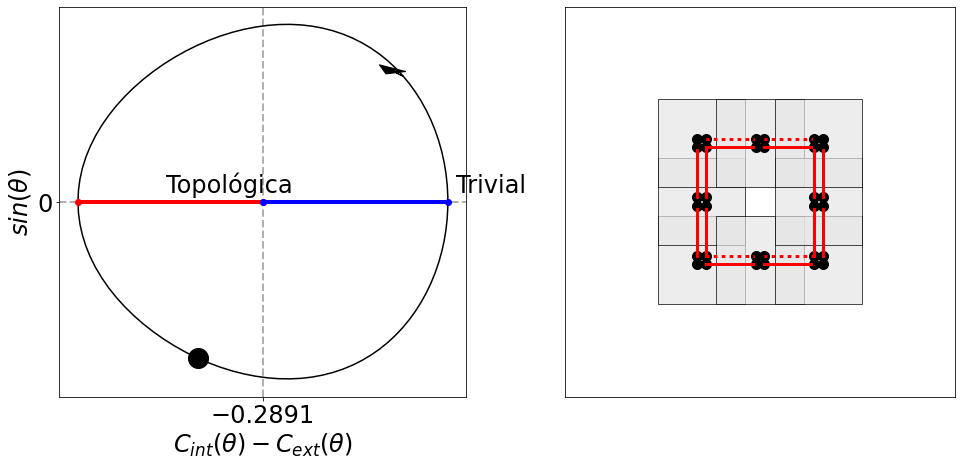

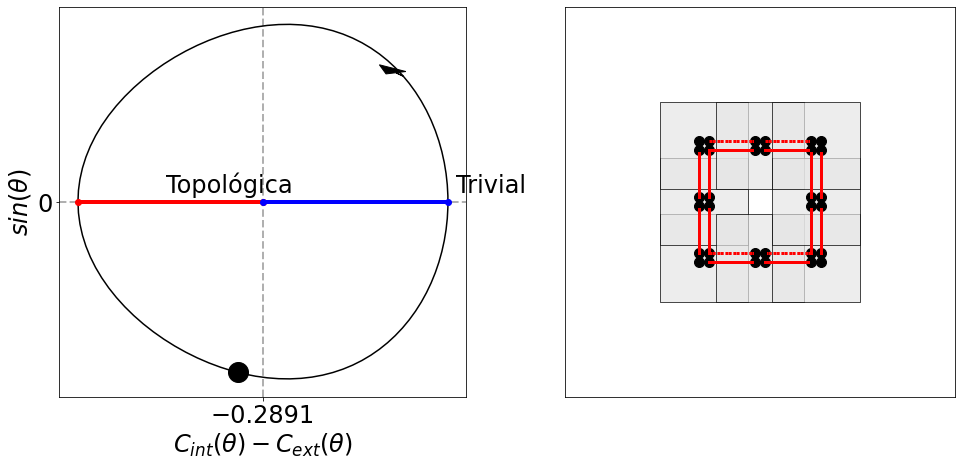

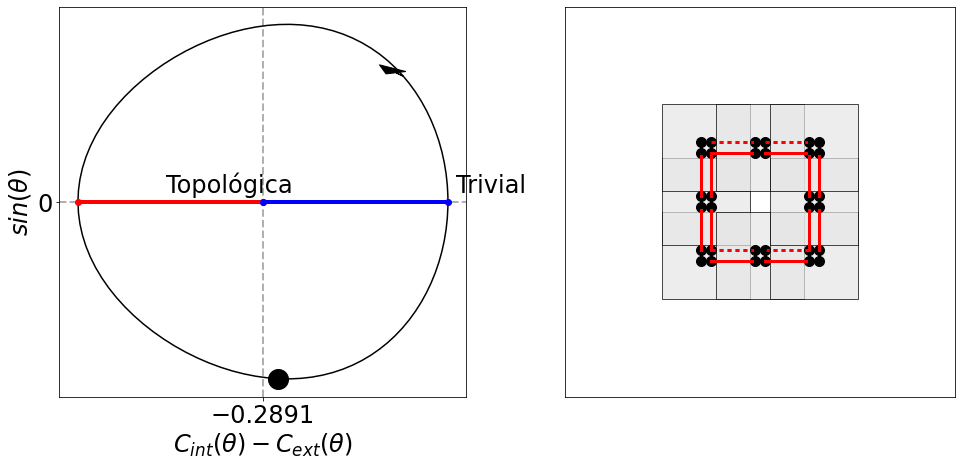

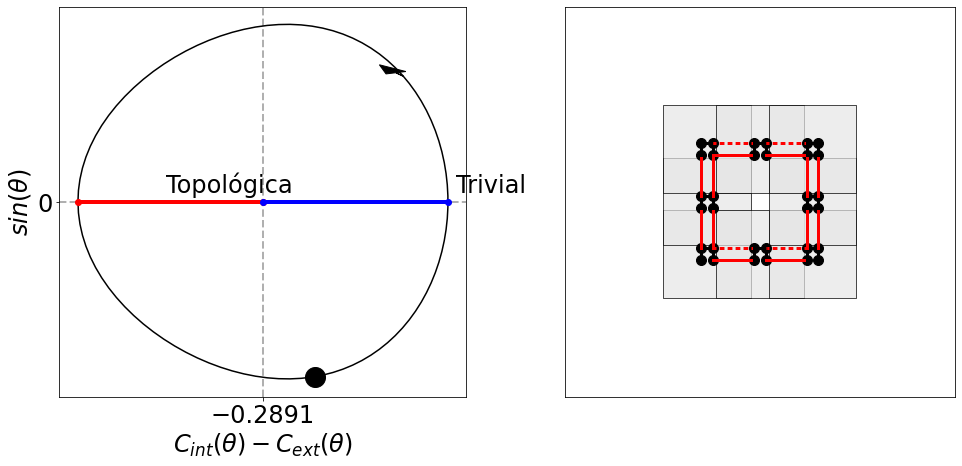

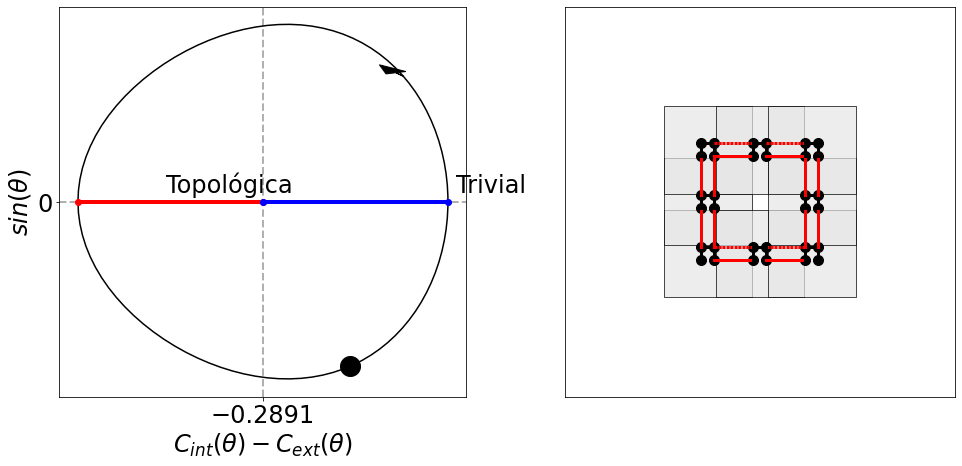

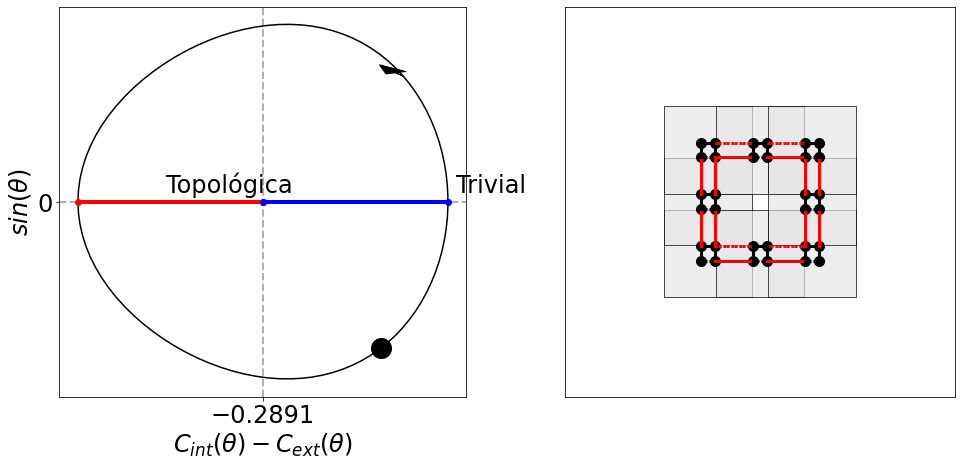

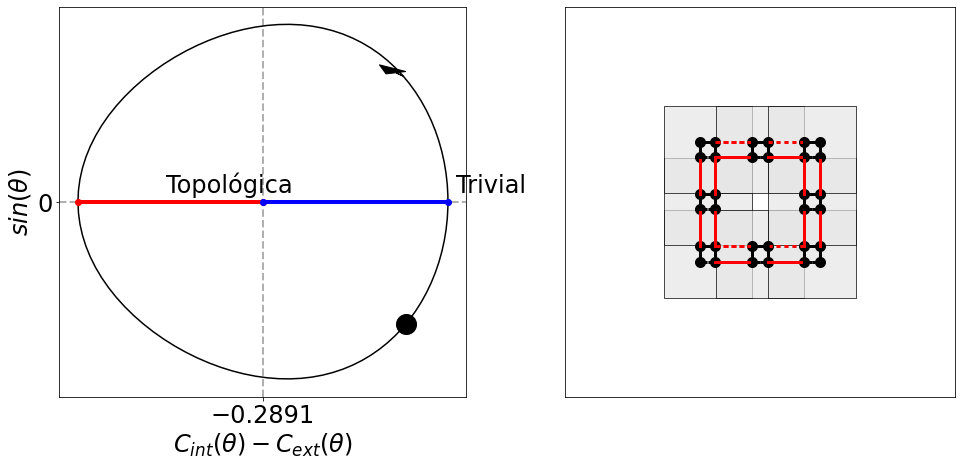

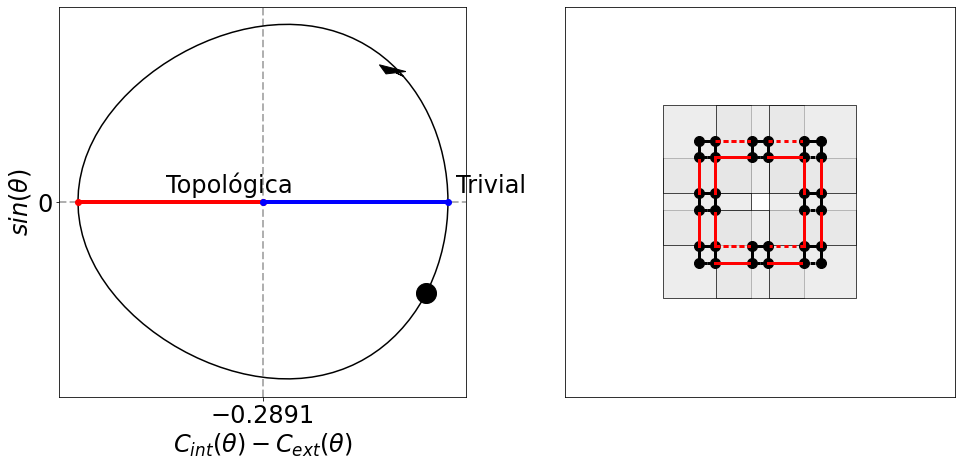

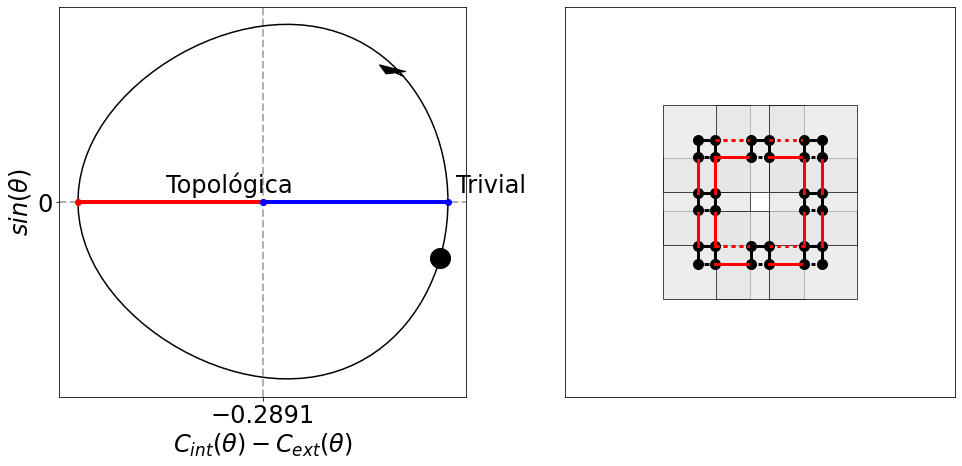

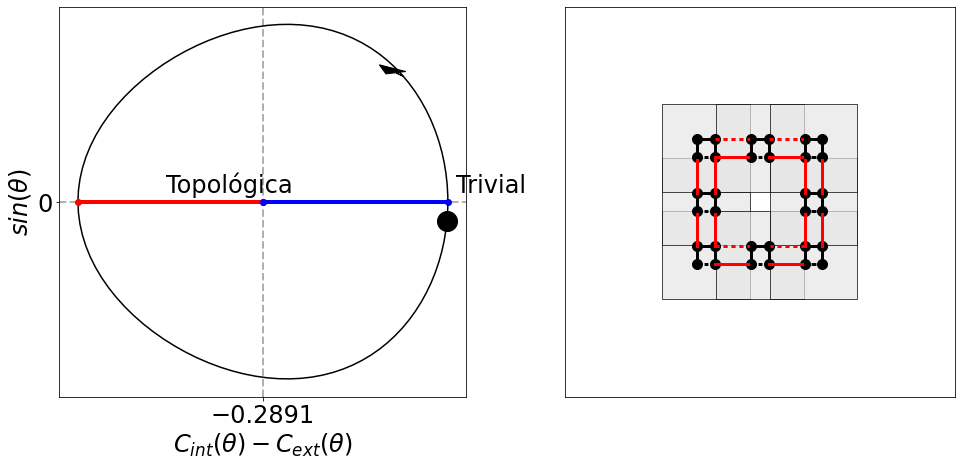

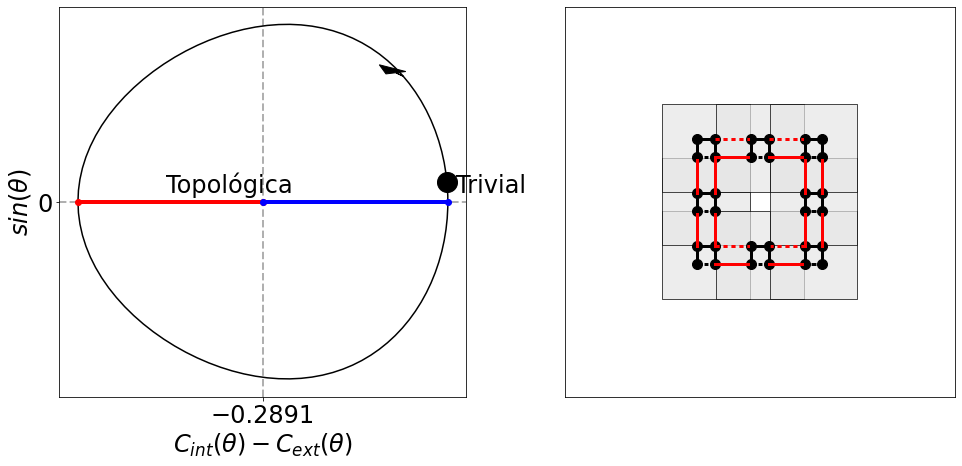

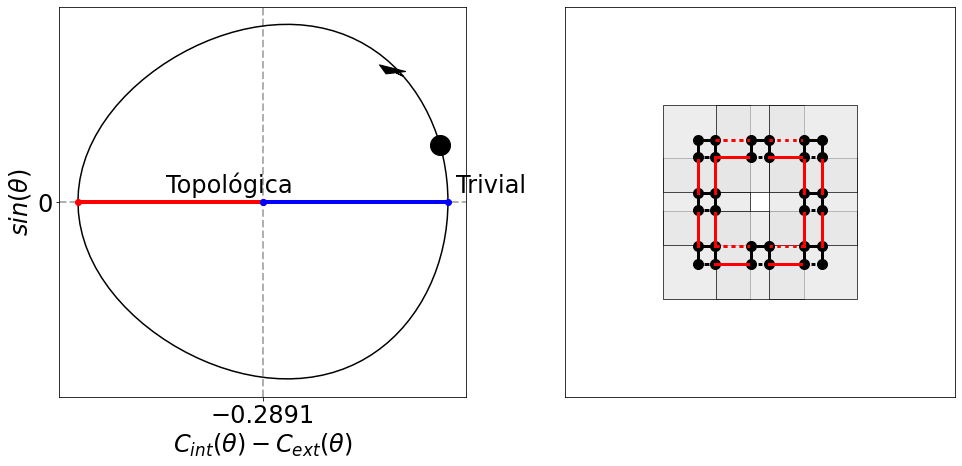

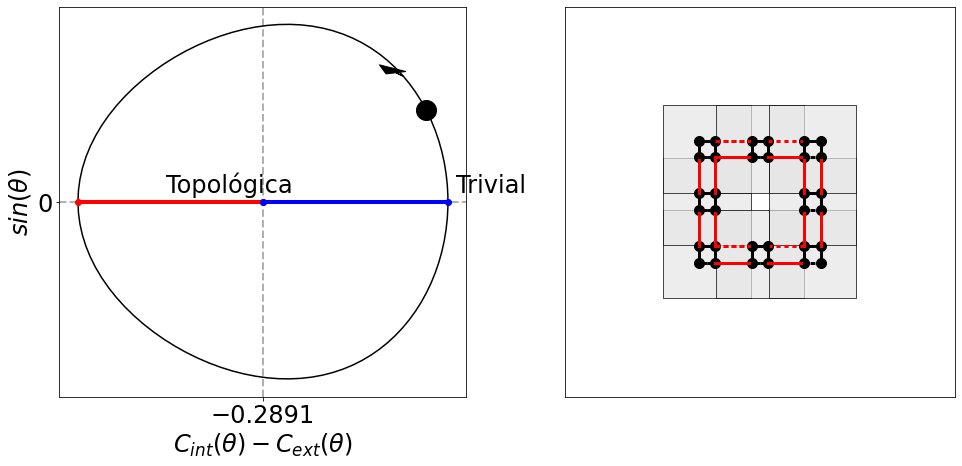

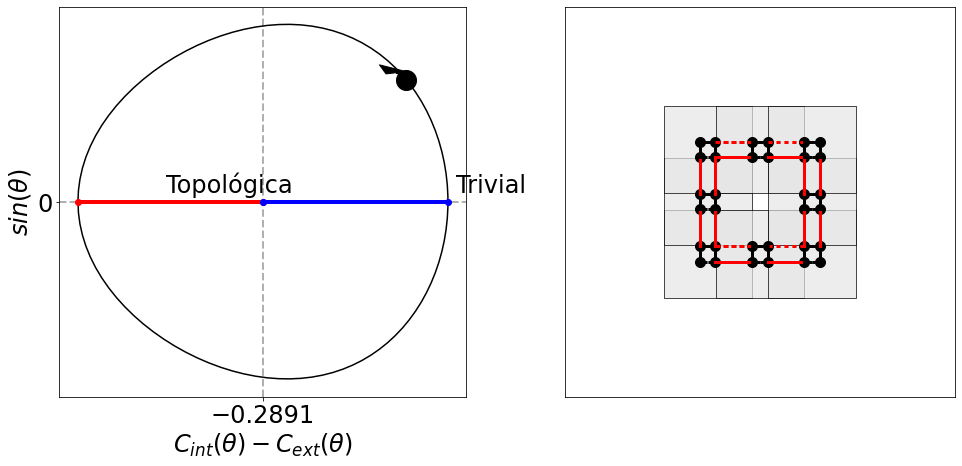

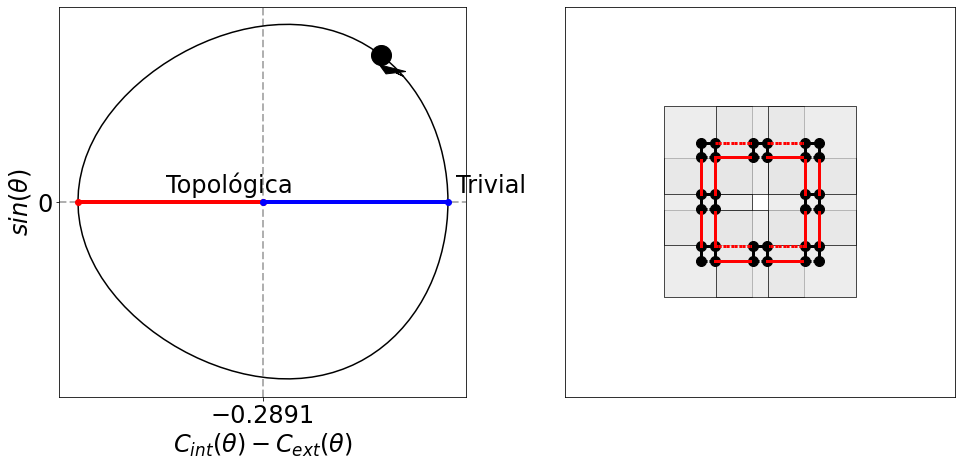

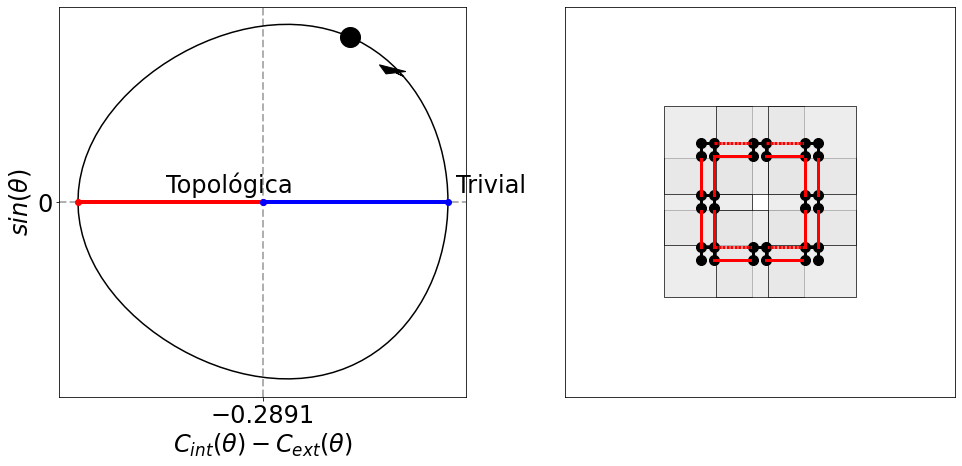

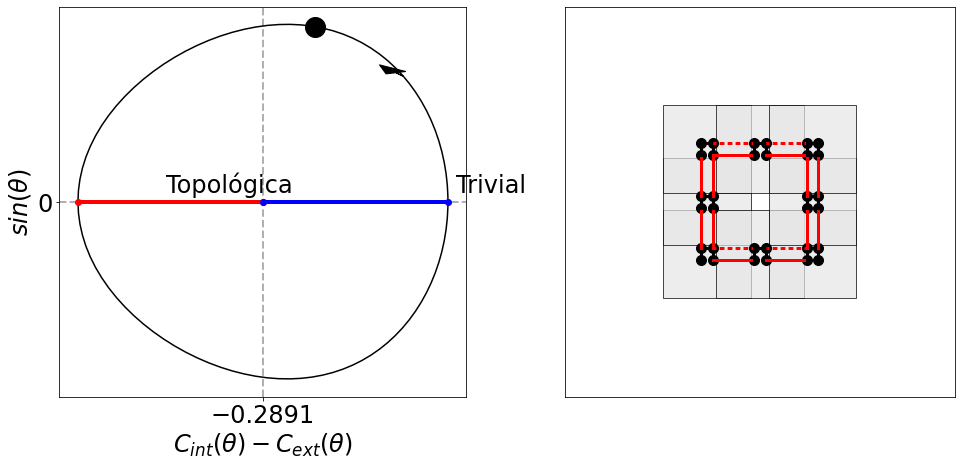

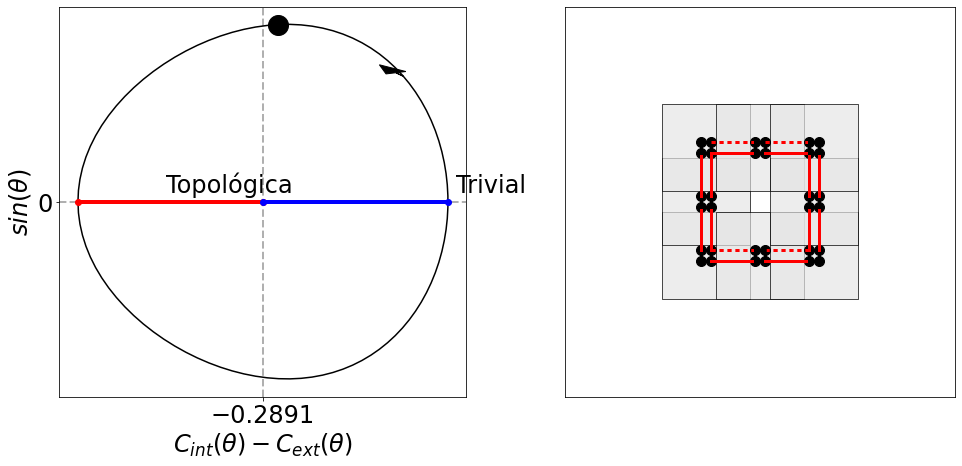

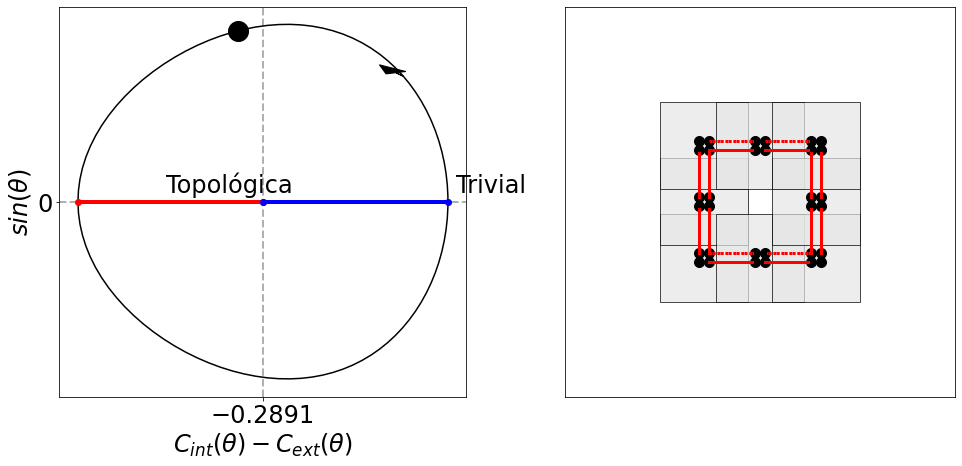

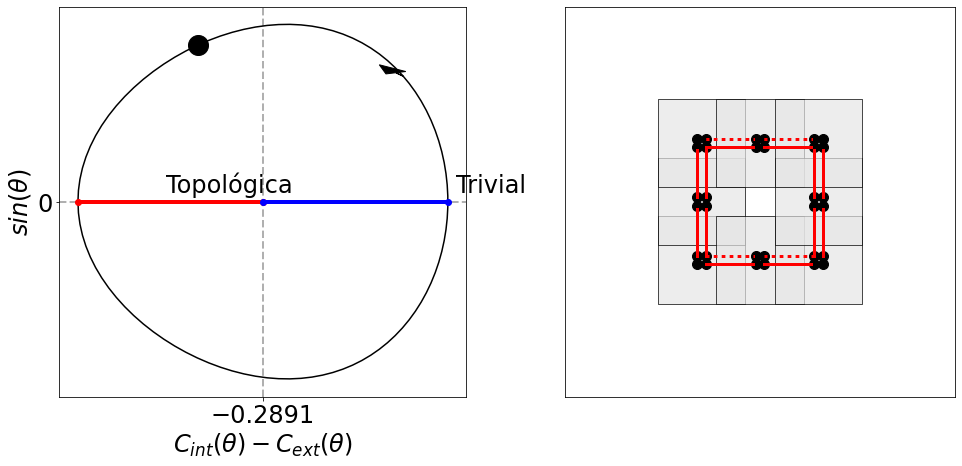

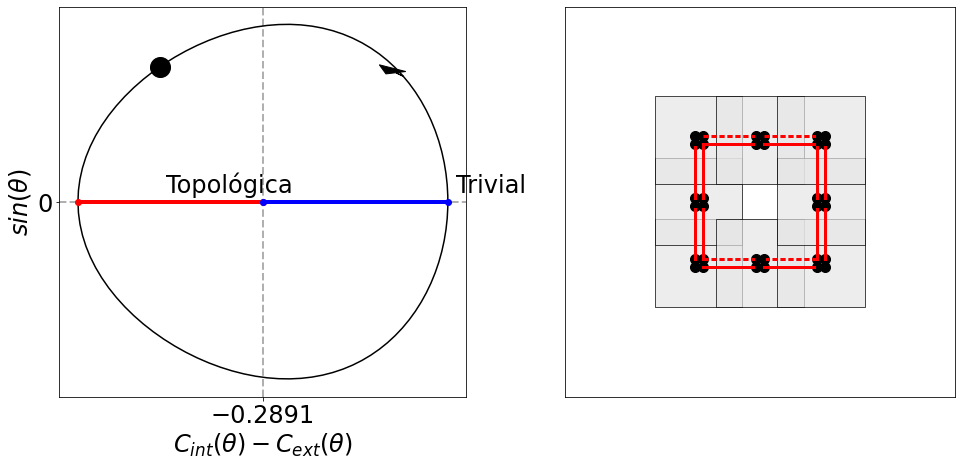

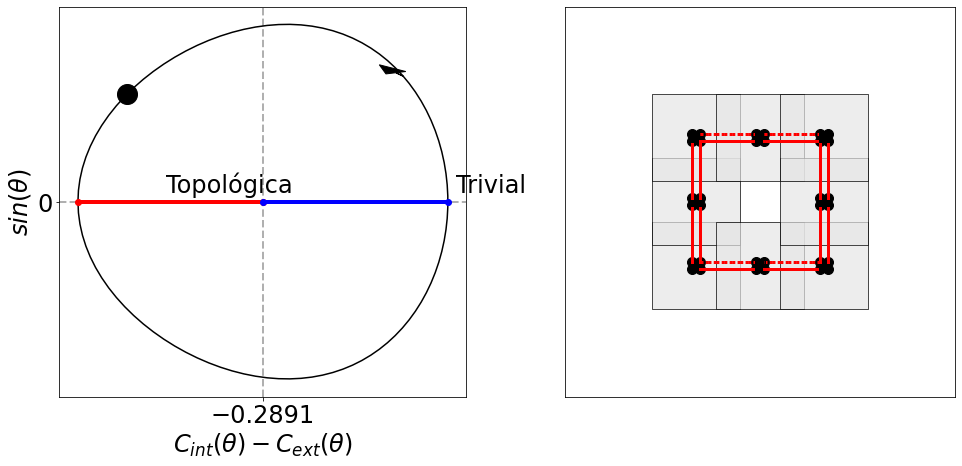

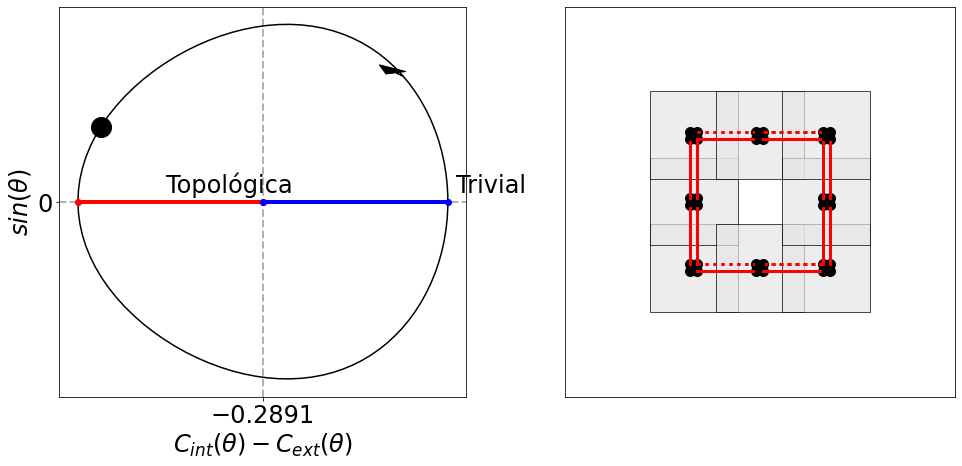

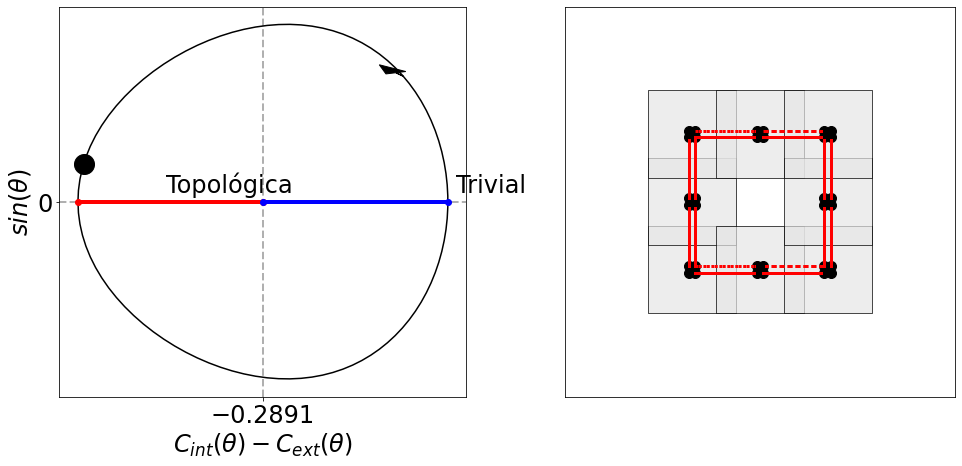

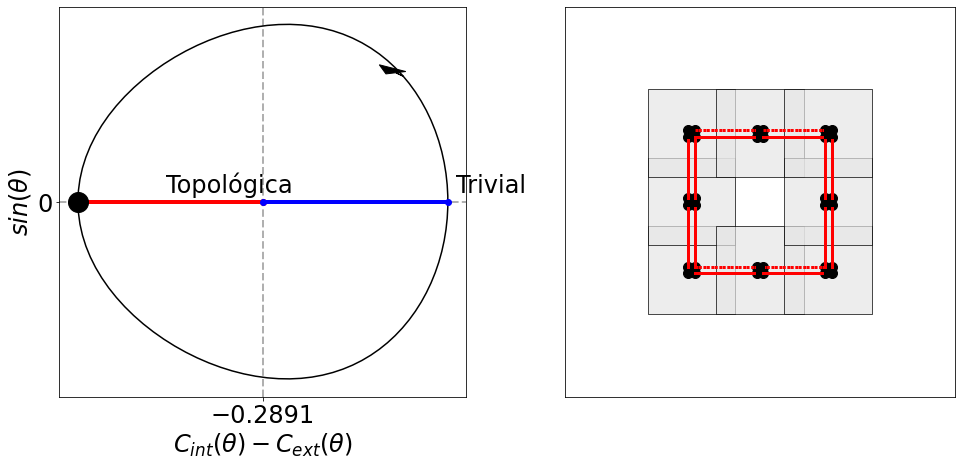

In [183]:
count=0
for θ in np.linspace(-pi,pi,30):
    Nx = []
    Ny = []
    cx = (np.amax(x) + np.amin(x))/2
    cy = (np.amax(y) + np.amin(y))/2
    
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = ((xmax + xmin)/2 - cy)*func_cext(θ)/2 + cx 
        ry = ((ymax + ymin)/2 - cy)*func_cext(θ)/2 + cy

        X = func_cint(θ)*(X - rx) + rx
        Y = func_cint(θ)*(Y - ry) + ry

        Nx = np.concatenate((Nx, X), axis=None)
        Ny = np.concatenate((Ny, Y), axis=None)
        
    Rx = []
    Ry = []
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [Nx[i] for i in find]
        Y = [Ny[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Rx.append(rx)
        Ry.append(ry)

    
        
    figsize(14,7)
    fig, ax = plt.subplots(1,2)
    ax[1].plot(Nx,Ny, marker='o', color='black', markersize=10,linestyle="")
    
    ω = np.linspace(-pi,pi,100)
    
    ax[0].plot(func_cint(ω) - func_cext(ω), sin(ω), color='black', ls='-')
    
    
    mid = (func_cint(-pi) - func_cext(-pi) + func_cint(0) - func_cext(0))/2
    ax[0].plot([func_cint(-pi) - func_cext(-pi) , mid], [sin(-pi),0], marker='o',color='red', ls='-', lw=4)
    ax[0].plot([func_cint(0) - func_cext(0) , mid], [sin(0),0], marker='o',color='blue', ls='-', lw=4)
    
    ax[0].arrow(func_cint(pi/4) - func_cext(pi/4), sin(pi/4), 
               -0.01,0.02,
                  head_width=0.03, head_length=0.05, fc='black', ec='black')
    
    ax[0].text((func_cint(-pi) - func_cext(-pi))/2-0.15, sin(-pi)+0.05,'Topológica' , color='black')
    ax[0].text((func_cint(pi/2) - func_cext(pi/2))/2+0.1, sin(-pi)+0.05,'Trivial' , color='black')
    
    ax[0].plot([func_cint(θ) - func_cext(θ)], [sin(θ)], marker='o', color='black', markersize=20)


    boxes = []
    for i in range(len(Rx)):
        rect = Rectangle((Rx[i]- 0.45, Ry[i] - 0.45), 0.9,0.9)
        boxes.append(rect)
    for i in Dic.keys():
        c = 0
        for v in Dic[i]:
            if Hop[i][c] == 1:
                ax[1].plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'black', lw = 3)
            elif Hop[i][c] == -1:
                ax[1].plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'black', lw = 3, ls = ':')
            elif Hop[i][c] == 4.5:
                ax[1].plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'r', lw =3)
            elif Hop[i][c] == -4.5:
                ax[1].plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'r', lw =3, ls = ':')
            c+=1  



    pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
    ax[1].add_collection(pc)
    fig.tight_layout()
    ax[1].set_aspect('equal')
    #ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xlim(min(x)+0.5, max(x)-0.5)
    ax[1].set_ylim(min(y)+0.5, max(y)-0.5)
    
    
    ax[0].set_ylabel(r'$sin(\theta)$')
    ax[0].set_xlabel(r'$C_{int}(\theta) - C_{ext}(\theta)$')
    ax[0].set_xticks([mid])
    ax[0].set_yticks([0.0])
    ax[0].grid(linestyle='--', lw=2)
    
    fig.tight_layout()
    #fig.savefig('hoti_pomp_{}.pdf'.format(θ))
    fig.savefig('images/video_images2/hoti_pomp_{}.png'.format(count))
    count+=1
    
    #plt.show()
    

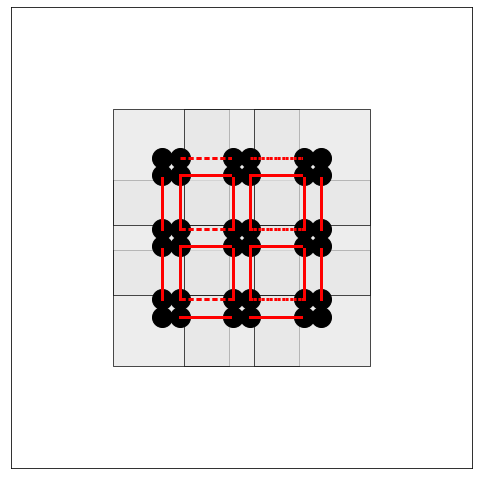

In [100]:
figsize(7,7)
fig, ax = plt.subplots(1)
ax.plot(Nx,Ny, marker='o', color='black', markersize=20,linestyle="")

boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - 0.75, Ry[i] - 0.75), 1.5,1.5)
    boxes.append(rect)
for i in Dic.keys():
    c = 0
    for v in Dic[i]:
        if Hop[i][c] == 1:
            ax.plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'black', lw = 3)
        elif Hop[i][c] == -1:
            ax.plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'black', lw = 3, ls = ':')
        elif Hop[i][c] == 4.5:
            ax.plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'r', lw =3)
        elif Hop[i][c] == -4.5:
            ax.plot((Nx[i],Nx[v]),(Ny[i],Ny[v]),c = 'r', lw =3, ls = ':')
        c+=1  
        

    
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
#ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(min(x)-0.5, max(x)+0.5)
ax.set_ylim(min(y)-0.5, max(y)+0.5)
fig.tight_layout()
#fig.savefig('hoti_fractal_square.pdf')
plt.show()